In [118]:
from Bio import Entrez
from Bio import Medline
import re, collections, urllib2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Entrez.email = 'dkoes@pitt.edu'

In [63]:
h = Entrez.esearch(db='pubmed',retmax=100000,term='"Nucleic Acids Res."[Journal]  http' )
result = Entrez.read(h)
ids = result['IdList']
len(ids)

4471

In [76]:
h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='text')
records = Medline.parse(h)
articles = []
for record in records:
    if 'AB' in record:
        abstract = record['AB']
        if 'SO' in record and (re.search('W1',record['SO']) or re.search('Web Server',record['SO'])):
            for uri in re.findall(r'https?://\S*',abstract):
                uri = uri.rstrip('.')
                uri = uri.rstrip(',')
                uri = uri.rstrip(')')
                year = record['DP'].split()[0]
                articles.append((uri,year,record['TI']))
                break #first url only

In [77]:
len(articles)

1232

In [103]:
cnts = collections.Counter([x[0] for x in articles])
cnts.most_common()[:10]

[('http://www.babelomics.org', 5),
 ('http://bioinformatics.ca/links_directory/', 5),
 ('http://vortex.cs.wayne.edu/Projects.html', 3),
 ('http://www.gepas.org', 3),
 ('http://visant.bu.edu', 3),
 ('http://pda.uab.es/', 2),
 ('http://www.microbial-pathogenesis.org/stickwrld/', 2),
 ('http://bioportal.bioontology.org', 2),
 ('http://sfold.wadsworth.org', 2),
 ('http://omicspace.riken.jp/', 2)]

In [170]:
def testurl(url):
    '''Return true if url is accessible and has content'''
    try:
        web = urllib2.urlopen(url,timeout=30) #interestingly, 10 is too short for some sites
        return web.code >= 200 and web.code < 300
    except:
        return False

In [172]:
deadByYear = collections.defaultdict(int)
totalByYear = collections.defaultdict(int)
corpses = []
for (i,a) in enumerate(articles):
    if i % 100 == 0:
        print i #status
    url = a[0]
    year = a[1]
    totalByYear[year] += 1
    if not testurl(url):
        deadByYear[year] += 1
        corpses.append(a)        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200


In [173]:
dead = np.array(sorted(deadByYear.items()),dtype=np.float)
total = np.array(sorted(totalByYear.items()),dtype=np.float)

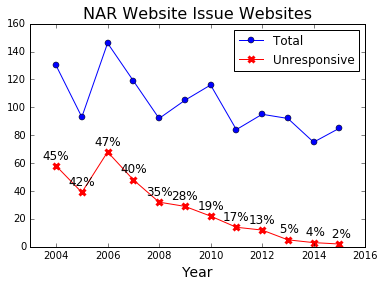

In [174]:
plt.plot(total[:,0],total[:,1],'o-',label="Total")
plt.plot(dead[:,0],dead[:,1],'rx-',label="Unresponsive",mew=3)
for (year,d,t) in zip(dead[:,0],dead[:,1],total[:,1]):                                       # <--
    plt.annotate('%2.0f%%' % (100.0*d/t),xy=(year,d+5), textcoords='data', horizontalalignment='center',fontsize=12) 
plt.xlabel("Year",fontsize=14)
plt.xlim(2003,2016)
plt.legend(loc='best',numpoints=1)
plt.title("NAR Website Issue Websites",fontsize=16)
plt.savefig("nar.png",bbox_inches='tight')

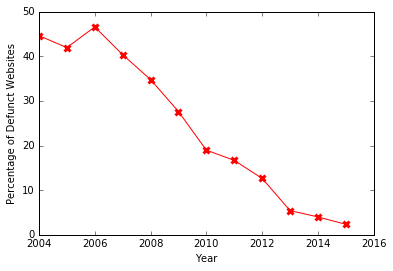

In [175]:
plt.plot(dead[:,0],100*np.divide(dead[:,1],total[:,1]),'rx-',label="Defunct",mew=3)
plt.ylabel("Percentage of Defunct Websites")
plt.xlabel("Year")


In [176]:
corpses

[('http://mcg.ustc.edu.cn/db/cnv/',
  '2015',
  'DeAnnCNV: a tool for online detection and annotation of copy number variations from whole-exome sequencing data.'),
 ('http://www.ebi.ac.uk/Tools/hmmer/',
  '2015',
  'HMMER web server: 2015 update.'),
 ('http://piqmie.semiqprot-emc.cloudlet.sara.nl',
  '2014',
  'PIQMIe: a web server for semi-quantitative proteomics data management and analysis.'),
 ('http://', '2014', 'NeuroPID: a classifier of neuropeptide precursors.'),
 ('http://dcb-reymond23.unibe.ch:8080/MCSS/',
  '2014',
  'A multi-fingerprint browser for the ZINC database.'),
 ('http://biolod.org/PosMed',
  '2013',
  'PosMed: Ranking genes and bioresources based on Semantic Web Association Study.'),
 ('http://www.biocomputing.it/fidea;',
  '2013',
  'FIDEA: a server for the functional interpretation of differential expression analysis.'),
 ('http://pdbinder.bio.uniroma2.it/PDBinder',
  '2013',
  'webPDBinder: a server for the identification of ligand binding sites on protein str